In [7]:
import sys
import os


notebook_path = os.getcwd()
module_path = os.path.join(notebook_path, '..')
# add your Confocal_GUI directory path 

sys.path.append(module_path)

from confocal_gui.live_plot import ple, pl, live, change_to_inline, change_to_nbagg, enable_long_output, PLELive, DataFigure
from confocal_gui.logic import LaserStabilizer, VirtualLaserStabilizerCore, LaserStabilizerCore
from confocal_gui.virtual_device import VirtualScanner, virtual_read_counts
from confocal_gui.device import TLB6700, WaveMeter671, read_counts, AFG3052C
# from confocal_gui.device import *
# define your device in confocal_gui/device.py
from confocal_gui.gui import GUI

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# initialize all classes and functions, bind them to devices wanted

enable_long_output()
# make sure that GUI() can output fig to jupyter notebook cell without being scrolled

config = {
    
    "scanner": {
        "type": "AFG3052C",
    },
    
    "counter": {
        "type": "read_counts",
    },
    
    "wavemeter": {
        "type": "WaveMeter671",
    },
    
    "laser": {
        "type": "TLB6700",
    },
    
    "laser_stabilizer_core": {
        "type": "LaserStabilizerCore",
        'config_instances':'config_instances'
    },
    
    "laser_stabilizer": {
        "type": "LaserStabilizer",
        'config_instances':'config_instances'
    },
    
    
}
# scanner, counter, laser_stabilizer_core, laser_stabilizer, wavemeter, laser etc. 
# are default keys for all functions to call objetive, 'type' defines bind which class
# or function to the key.

def initialize_classes(config):
    instances = {}
    
    for key, params in config.items():
        if 'config_instances' not in params:
            type_name = params.pop('type')
            class_or_func = globals()[type_name]
            
            if callable(class_or_func):
                if hasattr(class_or_func, '__call__') and not hasattr(class_or_func, '__bases__'):
                    instances[key] = class_or_func
                else:
                    instances[key] = class_or_func(**params)

    for key, params in config.items():
        if 'config_instances' in params:
            type_name = params.pop('type')
            class_or_func = globals()[type_name]
            params.pop('config_instances')  # Remove the config_instances key
            instances[key] = class_or_func(instances, **params)
            
    for key, value in instances.items():
        print(f"{key}: {value}")
        print('\n')
        
    
    return instances

config_instances = initialize_classes(config)


scanner: <confocal_gui.device.AFG3052C object at 0x00000000319B4640>


counter: <function read_counts at 0x00000000171B69D0>


wavemeter: <confocal_gui.device.WaveMeter671 object at 0x00000000319F35B0>


laser: <confocal_gui.device.TLB6700 object at 0x00000000319F3B80>


laser_stabilizer_core: <confocal_gui.logic.LaserStabilizerCore object at 0x00000000319F3B20>


laser_stabilizer: <LaserStabilizer(Thread-5, initial daemon)>




In [3]:
help(ple)

Help on function ple in module confocal_gui.live_plot:

ple(wavelength_array, exposure, config_instances)



<IPython.core.display.Javascript object>


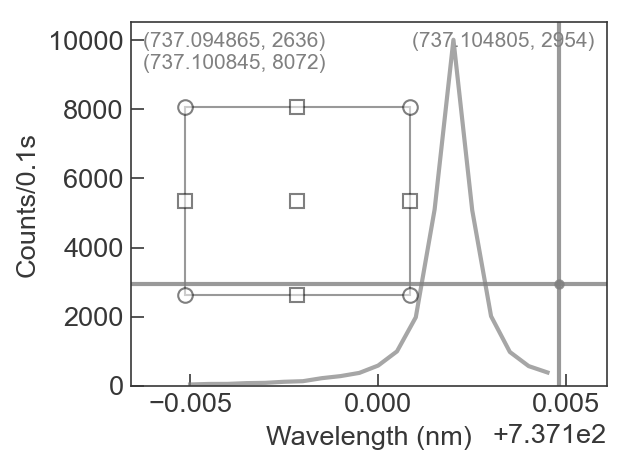

In [4]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
# defines ple_test_dict for testing purpose only
fig, data_figure = ple(np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict})

In [ ]:
# use mouse left to select/cancel area in fig
# use mouse middle to scroll range
# use mouse right to select point, or double clicks to remove point

<IPython.core.display.Javascript object>


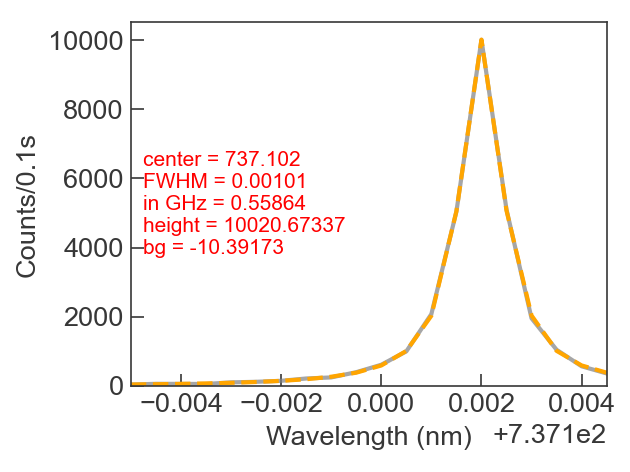

In [6]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102}
# defines ple_test_dict for testing purpose only
fig, data_figure = ple(np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict})

In [7]:
data_figure.data
# get data from return data_figure
# data_figure is a instance of DataFigure 
# defines in confocal_gui.live_plot

[array([737.095 , 737.0955, 737.096 , 737.0965, 737.097 , 737.0975,
        737.098 , 737.0985, 737.099 , 737.0995, 737.1   , 737.1005,
        737.101 , 737.1015, 737.102 , 737.1025, 737.103 , 737.1035,
        737.104 , 737.1045]),
 array([   40.,    62.,    60.,    57.,   104.,   120.,   149.,   216.,
          247.,   398.,   613.,  1000.,  2078.,  5040., 10007.,  5101.,
         1956.,  1046.,   569.,   362.])]

In [8]:
data_figure.lorent()
# call lorent() to get a lorentzian fit

In [7]:
data_figure.save()
# save figure 

In [9]:
help(pl)

Help on function pl in module confocal_gui.live_plot:

pl(center, coordinates_x, coordinates_y, exposure, config_instances, is_dis=False, wavelength=None)
    example
    
    >>> pl(center=[0, 0], coordinates_x=np.linspace(-5,5,10),         coordinates_y=np.linspace(-5,5,10), exposure=0.2)



<IPython.core.display.Javascript object>


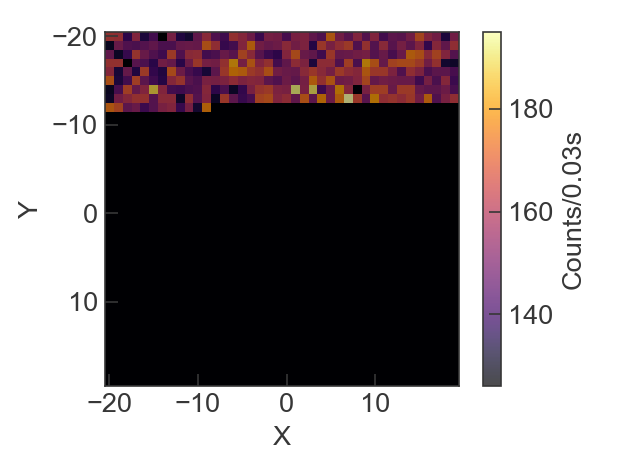

In [10]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
# defines pl_test_dict for testing purpose only
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.03, \
                               config_instances={**config_instances, **pl_test_dict})

In [ ]:
# can be interrupted by interrupt

<IPython.core.display.Javascript object>


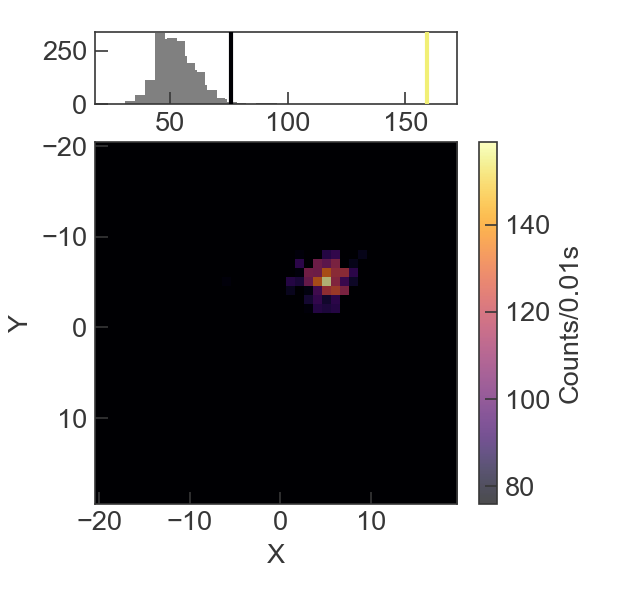

In [11]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
fig, data_figure = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.01, is_dis=True,\
                               wavelength = 2, config_instances={**config_instances, **pl_test_dict})

In [ ]:
# drag two vertical lines in histogram to reset colorbar
# enables remove background

In [12]:
help(live)

Help on function live in module confocal_gui.live_plot:

live(data_array, exposure, config_instances, wavelength=None, is_finite=False)



<IPython.core.display.Javascript object>


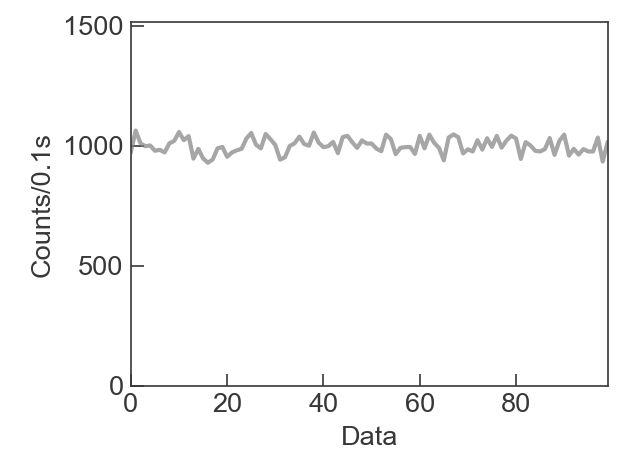

In [15]:
fig, data_figure = live(np.arange(100), exposure=0.1, wavelength=None, 
                                           is_finite=True, config_instances=config_instances)
# wavelength defines wavelength for live plot

<IPython.core.display.Javascript object>


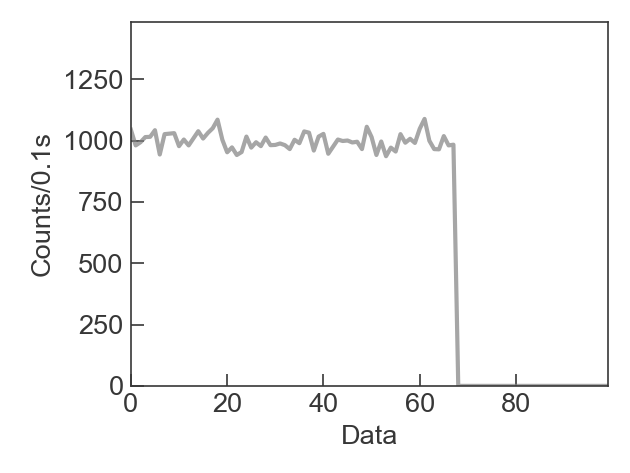

In [14]:
fig, data_figure = live(np.arange(100), exposure=0.1, config_instances=config_instances)

In [3]:
help(GUI)

Help on function GUI in module confocal_gui.gui:

GUI(config_instances)
    The function opens pyqt GUI for PLE, PL, live counts, and pulse control.
    Save button will also output data and figure to jupyter notebook.
    
    Examples
    --------
    >>> GUI()
    
    Read range button reads range from area created by mouse left 
    
        Read wavelength button reads wavelength from point created by mouse right in PLE
    
        Read XY button reads x, y coordinates from point created by mouse right in PL 
    
        Change unit changes PLE unit between 'nm' and 'GHz'
    
        Move sacnner moves scanner to x, y displayed



moved scanner to (x = 0.0, y = 0.0)
PL started


Plot stopped
read x = 7.005380952380953, y = -4.805679300291551
moved scanner to (x = 7.0, y = -5.0)
PLE started


Plot stopped
curve fitted, center = 737.10992
FWHM = 0.00134
in GHz = 0.74158
height = 2217.2483
bg = 704.59375
wavelength was read to PL
PL range updated
PL started


Plot stopped
read x = 8.372023809523808, y = -10.678149659863951
moved scanner to (x = 8.0, y = -11.0)
PLE range updated
PLE started


fit cleared
curve fitted, center = 737.10993
FWHM = 0.0013
in GHz = 0.71502
height = 4332.24788
bg = 730.71439
changed unit to GHz
changed unit to nm
wavelength was read to PL
PL range updated
PL started


C:\Users\HAL9000\Downloads\Confocal-GUI-main\Confocal-GUI-main\Confocal_GUI\jupyter notebook examples\..\confocal_gui\live_plot.py:555: UserWarning: Attempting to set identical left == right == 762.0 results in singular transformations; automatically expanding.
  self.axright.set_xlim(vmin - (vmax-vmin)*0.1, vmax + (vmax-vmin)*0.1)



        2024_06_26_14_05_20
        


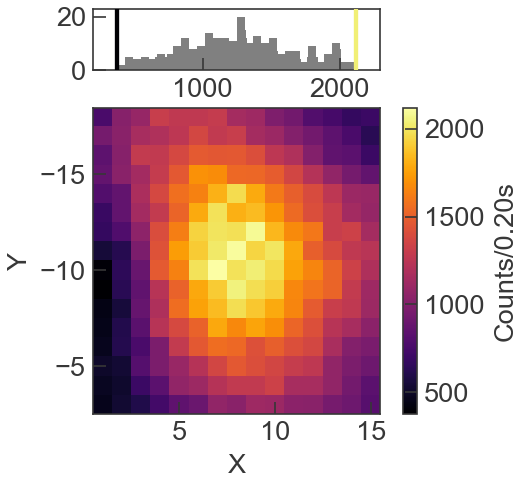

saved PL

        2024_06_26_14_05_22
        


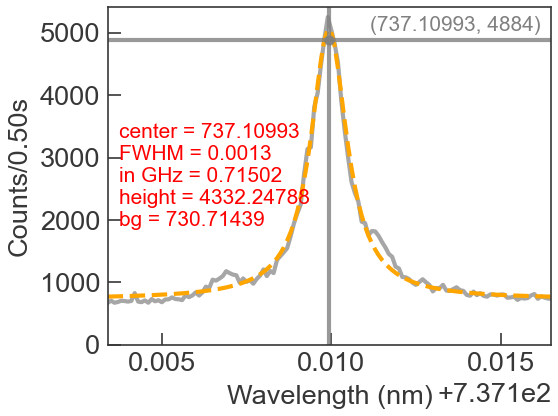

saved PLE
read x = 17.52938238380222, y = -21.705212096733792
moved scanner to (x = 18.0, y = -22.0)
read x = 21.322222176189978, y = -25.386497777580733
moved scanner to (x = 21.0, y = -25.0)
PLE started


wavelength was read to PL
PL range updated
PL range updated
PL started


read x = 14.862690476190473, y = -23.486149659863948
moved scanner to (x = 15.0, y = -23.0)
PLE range updated
PLE started


Plot stopped
fit cleared
curve fitted, center = 737.11975
FWHM = 0.00165
in GHz = 0.91091
height = 2558.53784
bg = 490.70283
wavelength was read to Live
Live started


Plot stopped
Live started


Live started


Plot stopped
wavelength was read to PL
PL range updated
PL started


PL range updated
PL started


Plot stopped
moved scanner to (x = 15.0, y = -23.0)
read x = 32.92237012987012, y = -37.107643784786646
moved scanner to (x = 33.0, y = -37.0)
PLE started


Plot stopped
PLE started


PLE range updated
PLE started


Plot stopped
fit cleared


c:\users\hal9000\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


curve fitted, center = 737.11865
FWHM = 0.75464
in GHz = 416.37777
height = 8849675.72717
bg = -8848375.03954
wavelength was read to PL
changed unit to GHz
fit cleared
wavelength was read to PL
PL range updated
PL range updated
PL started


PL range updated
PL started


changed unit to nm
Plot stopped

        2024_06_26_14_38_11
        


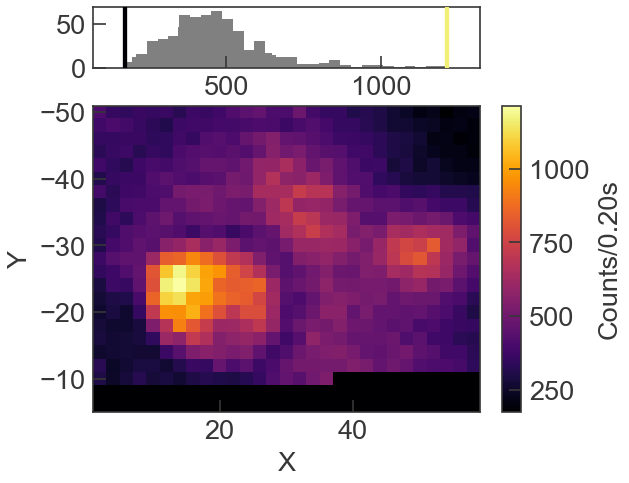

saved PL

        2024_06_26_14_38_13
        


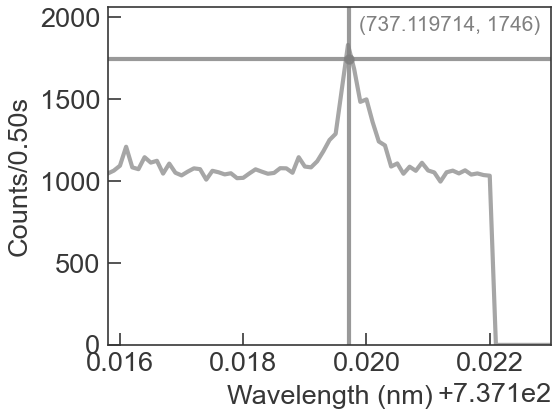

saved PLE


In [ ]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.10}
# defines pl_test_dict and ple_test_dict for testing
GUI(config_instances={**config_instances, **pl_test_dict, **ple_test_dict})

Text(0, 0.5, 'y')

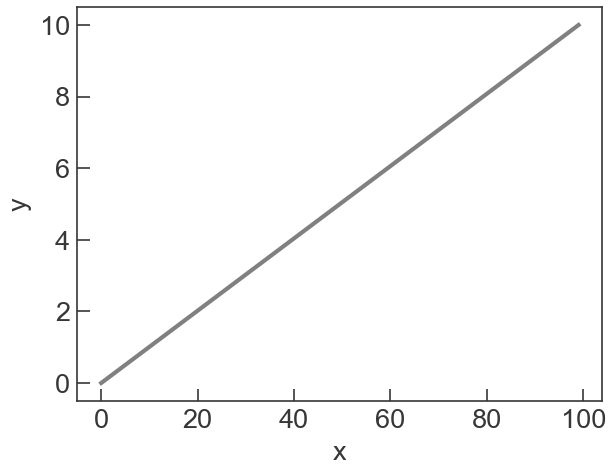

In [19]:
change_to_inline(params_type = 'inline') 
# go back to inline backend otherwise display error
plt.close()
plt.tight_layout()
plt.plot(np.linspace(0, 10, 100), color='grey')
plt.xlabel('x')
plt.ylabel('y')

In [18]:
import threading
import time
class PLEAreaAcquire(threading.Thread):
    """
    class for ple measurement (sum) for SiVs in selected area
    """
    def __init__(self, exposure, data_x, data_y, data_xx, data_yy, config_instances):
        super().__init__()
        self.exposure = exposure
        self.data_x = data_x
        self.data_y = data_y
        self.daemon = True
        self.is_running = True
        self.is_done = False
        self.counter = config_instances.get('counter')
        self.scanner = config_instances.get('scanner')
        self.config_instances = config_instances
        self.points_done = 0
        self.data_xx = data_xx
        self.data_yy = data_yy
        
    
    def run(self):
        
        
        self.laser_stabilizer = LaserStabilizer(config_instances = self.config_instances)
        self.laser_stabilizer.start()
        
        for i, wavelength in enumerate(self.data_x):
            self.laser_stabilizer.set_wavelength(wavelength)
            while self.is_running:
                time.sleep(0.01)
                if self.laser_stabilizer.is_ready:
                    break
            else:
                return 
            
            counts = 0
            for xx in self.data_xx:
                self.scanner.x = xx
                for yy in self.data_yy:
                    self.scanner.y = yy
                    
                    counts += self.counter(self.exposure, self)
                    
            self.points_done += 1

            self.data_y[i] += counts
            
        self.is_done = True
        #finish all data
        self.laser_stabilizer.stop()
        # stop and join child thread
        
    def stop(self):
        self.laser_stabilizer.stop()
        if self.is_alive():
            self.is_running = False
            self.join()
        
        
    def __enter__(self):
        return self
    
    def __exit__(self, exc_type, exc_value, exc_traceback):
        self.stop()

In [19]:
def ple_area(wavelength_array, exposure, x_array, y_array, config_instances):
                
    data_x = wavelength_array
    data_y = np.zeros(len(data_x))
    data_generator = PLEAreaAcquire(exposure = exposure, data_x=data_x, data_y=data_y, 
                                    data_xx = x_array, data_yy = y_array,
                                    config_instances = config_instances)
    liveplot = PLELive(labels=['Wavelength (nm)', f'Counts/{exposure}s'], \
                        update_time=0.1, data_generator=data_generator, data=[data_x, data_y])
    fig, selector = liveplot.plot()
    data_figure = DataFigure(fig, selector)
    return fig, data_figure

<IPython.core.display.Javascript object>


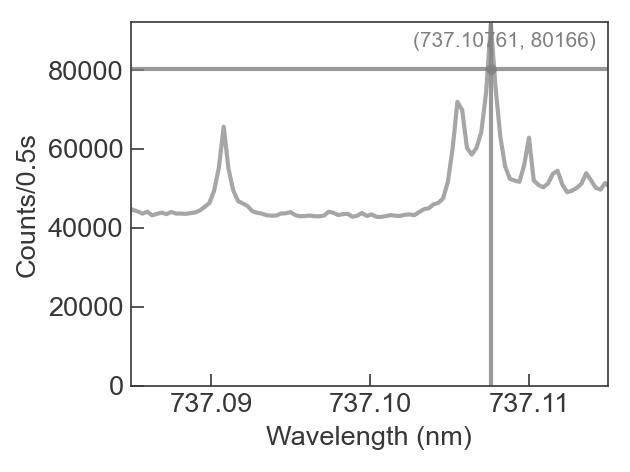

In [20]:
fig, data_figure = ple_area(wavelength_array = np.arange(737.08, 737.12, 0.0003), 
         exposure = 0.5, x_array = np.arange(20, 40, 3), 
         y_array = np.arange(-40, -20, 3), config_instances = config_instances)

In [ ]:
#737.0908, 1056, 1076

<IPython.core.display.Javascript object>


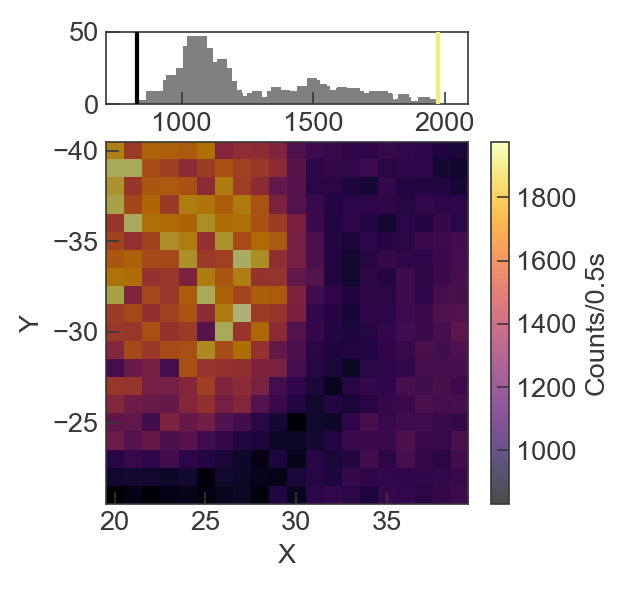

C:\Users\HAL9000\Downloads\Confocal-GUI-main\Confocal-GUI-main\Confocal_GUI\jupyter notebook examples\..\confocal_gui\live_plot.py:452: UserWarning: Attempting to set identical left == right == 1792.0 results in singular transformations; automatically expanding.
  self.axright.set_xlim(vmin - (vmax-vmin)*0.1, vmax + (vmax-vmin)*0.1)


In [21]:
fig, data_figure = pl(center=[30,-30], coordinates_x=np.arange(-10,10,1), \
                               coordinates_y=np.arange(-10,10,1), exposure=0.5, is_dis=True,\
                               wavelength = 737.0908, config_instances=config_instances)

<IPython.core.display.Javascript object>


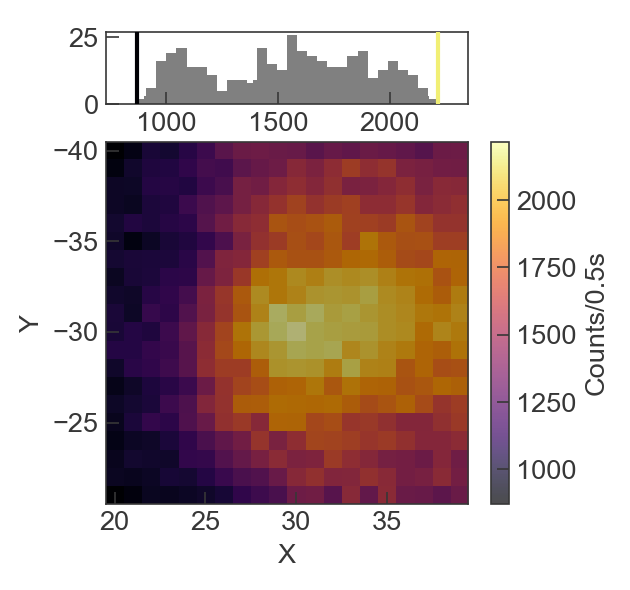

In [22]:
fig, data_figure = pl(center=[30,-30], coordinates_x=np.arange(-10,10,1), \
                               coordinates_y=np.arange(-10,10,1), exposure=0.5, is_dis=True,\
                               wavelength = 737.1056, config_instances=config_instances)

<IPython.core.display.Javascript object>


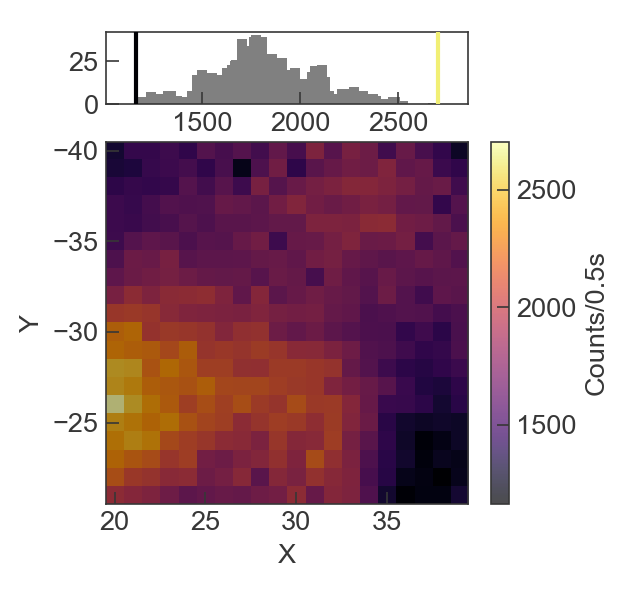

In [23]:
fig, data_figure = pl(center=[30,-30], coordinates_x=np.arange(-10,10,1), \
                               coordinates_y=np.arange(-10,10,1), exposure=0.5, is_dis=True,\
                               wavelength = 737.1076, config_instances=config_instances)

moved scanner to (x = 20.0, y = -26.0)
PLE started


curve fitted, center = 737.1077
FWHM = 0.00177
in GHz = 0.97715
height = 1568.85353
bg = 833.82547
PL started


Plot stopped
No wavelength to read
wavelength was read to PL
PL range updated
PL started


C:\Users\HAL9000\Downloads\Confocal-GUI-main\Confocal-GUI-main\Confocal_GUI\jupyter notebook examples\..\confocal_gui\live_plot.py:555: UserWarning: Attempting to set identical left == right == 317.0 results in singular transformations; automatically expanding.
  self.axright.set_xlim(vmin - (vmax-vmin)*0.1, vmax + (vmax-vmin)*0.1)



        2024_06_26_16_39_36
        


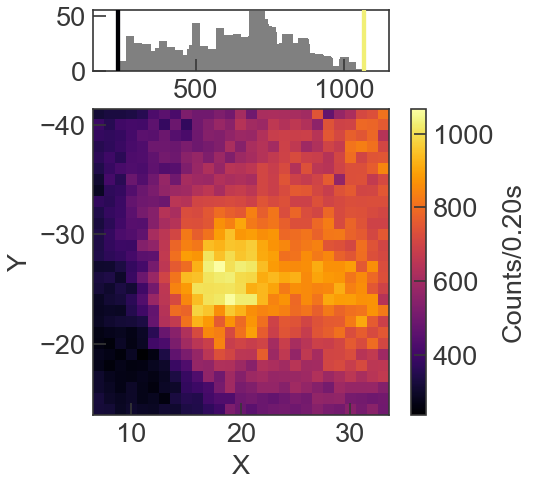

saved PL

        2024_06_26_16_39_38
        


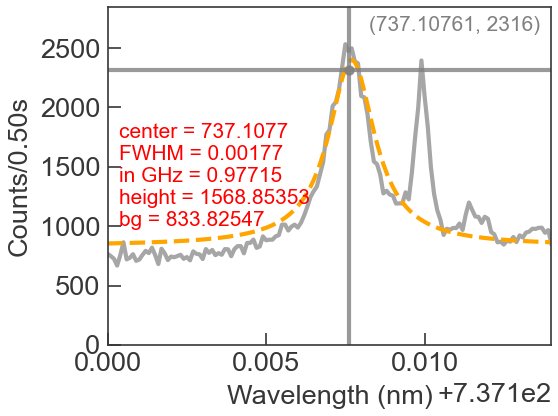

saved PLE
PL range updated
PL started


read x = 33.355140977443604, y = -29.913978824612556
moved scanner to (x = 33.0, y = -30.0)
PLE started



        2024_06_26_16_45_40
        


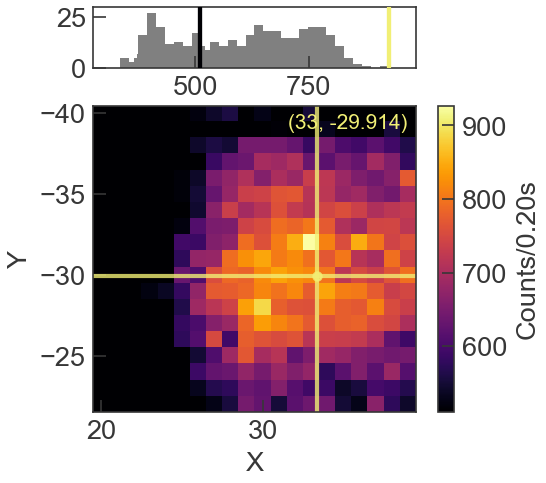

saved PL

        2024_06_26_16_45_42
        


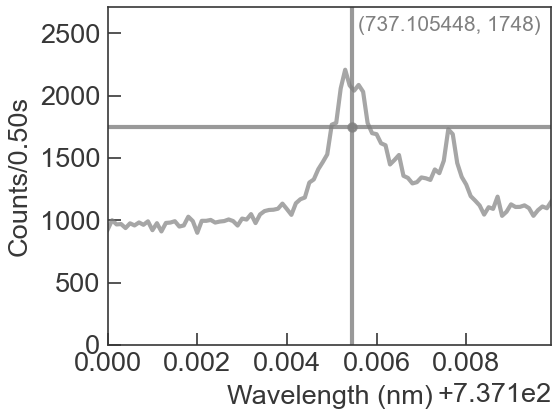

saved PLE


In [ ]:
GUI(config_instances=config_instances)